# Estudo Algoritmos de Agrupamento.
- O objetivo deste notebook é o estudo dos algoritmos: KMeans, Agrupamento Hierárquico (AgglomerativeClustering) e DBSCAN do scikit-learn.
- Vamos utilizar nesse estudo o dataset 'credit-card-clients.csv'.
- Iremos fazer uma breve comparação entre os resultados destes dos algoritmos para esta base dados.
- Este dataset contém 24 atributos e 30.000 instâncias (linhas). 

  

In [1]:
# Importando as bibliotecas iniciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importando o dataset
base = pd.read_csv('./credit-card-clients.csv', header = 1)

In [3]:
# Verificando o shape do dataset
base.shape

(30000, 25)

In [4]:
# Visualiza as primeira linhas
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Verificando os atributos núméricos.
base.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Pré-processamento - Tratamento dos dados

In [6]:
# Vamos criar uma coluna com a soma de todas as contas do cliente
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [7]:
# Seleciona os atributos previsores
# Não vamos considerar as colunas "id" e "date". A coluna "price" será o valor que vamos tentar prever. 
atributos = base.iloc[:, [1,25]].values
atributos.shape

(30000, 2)

In [8]:
atributos

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]], dtype=int64)

In [9]:
# StandardScaler para colocar todos os valores na mesma escala (escalonamento).
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
atributos = scaler.fit_transform(atributos)

# Criando os Modelos de Previsão para comparação

# Criando o modelo com o Algoritmo de Agrupamento KMeans

Text(0, 0.5, 'WCSS')

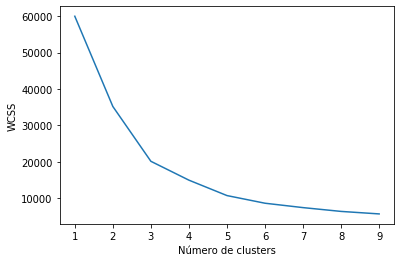

In [10]:
# Verificando a quantidade de Clusters ideal para este conjunto de dados.
# Basicamente existem três formas de fazer isso:
#    1 - Conhecimento Prévio da quatidade de Clusters;
#    2 - Sem conhecimento prévio da quatidade de Clusters, podemos usar a regra geral dada pela fórmula: cluters = Raiz quadrada de N/2, onde N é quatidade de registros;
#    3 - Utilizando o Elbow Method;
# Aqui vamos usar o Elbow Method (https://en.wikipedia.org/wiki/Elbow_method_(clustering))
# Após o valor indicado pelo “cotovelo” (curva acentuada) no gráfico indica que não possui ganho em relação ao aumento de clusters.
# Nesse ponto, significa que o método encontrou o número ideal para o argumento k.
# Obs: Nenhum destes métodos garante encontrar a quantidade ideal de cluters, para isso é necessário realizar diversos testes na base de dados.

# Para esse estudo vamos considerar o número de Clusters igual a 4.

from sklearn.cluster import KMeans

# Within cluster sum of squares
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(atributos)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

In [11]:
# Cria o modelo de agrupamgento KMeans

kmeans = KMeans(n_clusters = 4, random_state = 0)
previsoes_kmeans = kmeans.fit_predict(atributos)


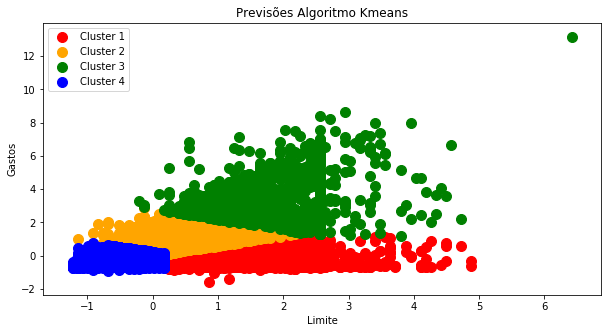

In [12]:
# Plota o grafico com os agrupamentos
plt.figure(figsize=(10,5))
plt.title('Previsões Algoritmo Kmeans')
plt.scatter(atributos[previsoes_kmeans == 0, 0], atributos[previsoes_kmeans == 0, 1], s = 100, c = 'red',    label = 'Cluster 1')
plt.scatter(atributos[previsoes_kmeans == 1, 0], atributos[previsoes_kmeans == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(atributos[previsoes_kmeans == 2, 0], atributos[previsoes_kmeans == 2, 1], s = 100, c = 'green',  label = 'Cluster 3')
plt.scatter(atributos[previsoes_kmeans == 3, 0], atributos[previsoes_kmeans == 3, 1], s = 100, c = 'blue',   label = 'Cluster 4')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();


In [13]:
# Incluindo na base o cluster previsto para registro.
df_kmeans = base
df_kmeans['Cluster'] = previsoes_kmeans
df_kmeans.groupby(['Cluster'])['Cluster'].count()

Cluster
0     7952
1     4413
2     1298
3    16337
Name: Cluster, dtype: int64

# Criando o modelo com o Algoritmo Agrupamento Hierárquico (AgglomerativeClustering)

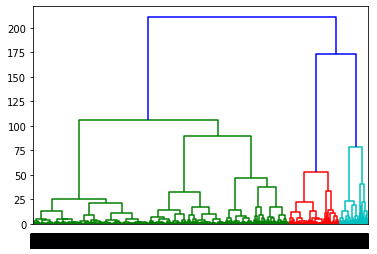

In [14]:
# Dendrograma é um tipo específico de representação icónica que organiza determinados fatores e variáveis (https://pt.wikipedia.org/wiki/Dendrograma).

# Dendograma – Visualizando a Análise de Cluster
# Usa-se o dendograma para visualizar o processo de clusterização passo a passo, assim como analisar os níveis de distância dos clusters formados. 
# Um bom ponto de decisão da clusterização final é onde os valores de distância mudam consideravelmente. 
# Para a decisão do agrupamento final também devem ser avaliados se os clusters formados fazem sentido para o problema.
# https://www.abgconsultoria.com.br/blog/o-que-e-analise-de-cluster/
 
# Para esse estudo vamos considerar o número de Clusters igual a 4.

from scipy.cluster.hierarchy import dendrogram, linkage

dendrograma = dendrogram(linkage(atributos, method = 'ward'))

In [15]:
# Cria o modelo de agrupamento Hierárquico

from sklearn.cluster import AgglomerativeClustering

aghier = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
previsoes_aghier = aghier.fit_predict(atributos)


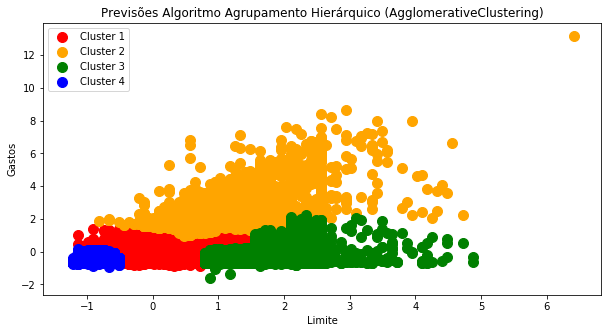

In [16]:
# Plota o grafico com os agrupamentos
plt.figure(figsize=(10,5))
plt.title('Previsões Algoritmo Agrupamento Hierárquico (AgglomerativeClustering)')
plt.scatter(atributos[previsoes_aghier == 0, 0], atributos[previsoes_aghier == 0, 1], s = 100, c = 'red',    label = 'Cluster 1')
plt.scatter(atributos[previsoes_aghier == 1, 0], atributos[previsoes_aghier == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(atributos[previsoes_aghier == 2, 0], atributos[previsoes_aghier == 2, 1], s = 100, c = 'green',  label = 'Cluster 3')
plt.scatter(atributos[previsoes_aghier == 3, 0], atributos[previsoes_aghier == 3, 1], s = 100, c = 'blue',   label = 'Cluster 4')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();


In [17]:
# Incluindo na base o cluster previsto para registro.

df_aghier = base
df_aghier['Cluster'] = previsoes_aghier
df_aghier.groupby(['Cluster'])['Cluster'].count()

Cluster
0    12566
1     2561
2     4480
3    10393
Name: Cluster, dtype: int64

# Criando o modelo com o Algoritmo Agrupamento DBSCAN

In [20]:
# Para o algoritmo DBSCAN não é necessário definir o número de clusters, ele vai descobrir sozinho, mas para isso precisamos ajustar os parâmetros até encontrar o melhor conjunto.
# A seguir vamos fazer alguns testes para tentar encontrar o melhor conjunto de parâmetros. 
from sklearn.cluster import DBSCAN

In [21]:
# Testando alguns conjuntos de parâmetros para o Algoritmo Agrupamento DBSCAN.
# Este teste é para nos ajudar a identificar o melhor conjundo de parâmetros para o algoritmo.
lista_resultados = []
indice = 0
for i in range(1, 500):
    for j in range(3, 13):
        
        eps_i = i/100
        min_samples_j = j
        dbscan = DBSCAN(eps = eps_i, min_samples = min_samples_j)
        unicos, quantidade = np.unique(dbscan.fit_predict(atributos), return_counts = True)  
        lista_resultados.append([indice, len(unicos), eps_i, min_samples_j , round(quantidade.std(), 2), round(quantidade.var(), 2), unicos , quantidade, (-1 in unicos)] )
        indice +=1       
        

In [22]:
# Cria o Dataframe com o resultado dos testes de parâmetros para o Algoritmo Agrupamento DBSCAN.
colunas = ['Indice', 'QtdCluters', 'EPS', 'MIN_SAMPLES', 'DesvioPadrao', 'Variancia', 'Clusters', 'ElementosClusters', 'ExisteElementoSemCluster']
df_cfg = pd.DataFrame(lista_resultados, columns=colunas)

In [23]:
# Olhando o formato
df_cfg.shape

(4990, 9)

In [24]:
# Olhando as primeiras linhas
df_cfg.head()

,Indice,QtdCluters,EPS,MIN_SAMPLES,DesvioPadrao,Variancia,Clusters,ElementosClusters,ExisteElementoSemCluster
0,0,929,0.01,3,198.30,39324.01,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[3550, 1958, 371, 97, 3331, 364, 237, 892, 721...",True
1,1,649,0.01,4,264.64,70032.01,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[4686, 1958, 370, 97, 3331, 364, 237, 892, 721...",True
2,2,517,0.01,5,325.05,105657.59,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[5620, 1956, 324, 97, 3331, 364, 217, 892, 721...",True
3,3,406,0.01,6,405.67,164568.04,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[6658, 1956, 324, 72, 3331, 364, 215, 892, 721...",True
4,4,344,0.01,7,479.62,230037.10,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[7594, 1956, 286, 37, 3331, 364, 214, 892, 381...",True


In [25]:
# Aqui vamos tentar identificar com qual conjunto de parâmetros o algoritmo teve o melhor desempenho para esta base de dados.
# Vamos filtrar pelo quantidade de cluters e ordenar pelo desvio padrão.
df_cfg[(df_cfg.QtdCluters > 2)  & (df_cfg.QtdCluters < 10)]. sort_values(by ='DesvioPadrao' , ascending=True)

,Indice,QtdCluters,EPS,MIN_SAMPLES,DesvioPadrao,Variancia,Clusters,ElementosClusters,ExisteElementoSemCluster
108,108,9,0.11,11,9120.79,8.318880e+07,"[-1, 0, 1, 2, 3, 4, 5, 6, 7]","[779, 29122, 11, 15, 12, 23, 15, 11, 12]",True
119,119,9,0.12,12,9122.80,8.322545e+07,"[-1, 0, 1, 2, 3, 4, 5, 6, 7]","[766, 29128, 21, 16, 13, 27, 12, 8, 9]",True
118,118,9,0.12,11,9145.84,8.364636e+07,"[-1, 0, 1, 2, 3, 4, 5, 6, 7]","[683, 29195, 10, 12, 39, 16, 20, 13, 12]",True
127,127,9,0.13,10,9192.80,8.450763e+07,"[-1, 0, 1, 2, 3, 4, 5, 6, 7]","[564, 29330, 13, 17, 23, 16, 14, 13, 10]",True
138,138,9,0.14,11,9194.88,8.454576e+07,"[-1, 0, 1, 2, 3, 4, 5, 6, 7]","[556, 29336, 15, 17, 23, 17, 11, 13, 12]",True
137,137,9,0.14,10,9202.54,8.468670e+07,"[-1, 0, 1, 2, 3, 4, 5, 6, 7]","[535, 29358, 15, 17, 14, 28, 9, 14, 10]",True
147,147,9,0.15,10,9209.09,8.480739e+07,"[-1, 0, 1, 2, 3, 4, 5, 6, 7]","[506, 29377, 16, 20, 15, 32, 14, 10, 10]",True
177,177,9,0.18,10,9306.76,8.661576e+07,"[-1, 0, 1, 2, 3, 4, 5, 6, 7]","[249, 29656, 21, 23, 10, 11, 14, 6, 10]",True
153,153,9,0.16,6,9314.76,8.676468e+07,"[-1, 0, 1, 2, 3, 4, 5, 6, 7]","[190, 29679, 19, 20, 12, 28, 33, 11, 8]",True
164,164,9,0.17,7,9316.52,8.679749e+07,"[-1, 0, 1, 2, 3, 4, 5, 6, 7]","[186, 29684, 20, 12, 27, 34, 11, 18, 8]",True


In [26]:
# Verificando se existe algum teste onde todos os elementos foram adicionaros a um cluster (-1  indica que o elemento ficou "fora" dos clusters criados ).
df_cfg[df_cfg.ExisteElementoSemCluster==False]

,Indice,QtdCluters,EPS,MIN_SAMPLES,DesvioPadrao,Variancia,Clusters,ElementosClusters,ExisteElementoSemCluster


In [27]:
# Para o algoritmo DBSCAN não é necessário definir o número de clusters, ele vai descobrir sozinho, mas para isso precisamos ajustar o parâmetros até achar o melhor conjunto. Fizemo Isso nos testes acima.
# Nos testes melhor configuração encontrada foi:
#        eps = 0.38
#        min_samples = 5
# Vamos usar ela para criar o modelo.

# Cria o modelo de agrupamento DBSCAN (Density Based Spatial Clustering of Applications with Noise) (https://en.wikipedia.org/wiki/DBSCAN)
dbscan = DBSCAN(eps = 0.38, min_samples = 5)
previsoes_dbscan = dbscan.fit_predict(atributos)


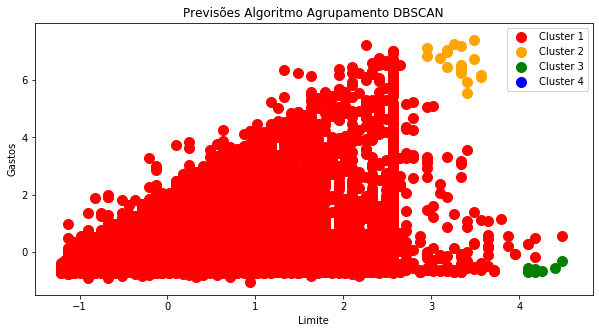

In [28]:
# Plota o grafico com os agrupamentos
plt.figure(figsize=(10,5))
plt.title('Previsões Algoritmo Agrupamento DBSCAN')
plt.scatter(atributos[previsoes_dbscan == -1, 0], atributos[previsoes_dbscan == -1, 1], s = 100, c = 'black',    label = 'Sem Cluster')
plt.scatter(atributos[previsoes_dbscan == 0, 0],  atributos[previsoes_dbscan == 0, 1],  s = 100, c = 'red',      label = 'Cluster 1')
plt.scatter(atributos[previsoes_dbscan == 1, 0],  atributos[previsoes_dbscan == 1, 1],  s = 100, c = 'orange',   label = 'Cluster 2')
plt.scatter(atributos[previsoes_dbscan == 2, 0],  atributos[previsoes_dbscan == 2, 1],  s = 100, c = 'green',    label = 'Cluster 3')
plt.scatter(atributos[previsoes_dbscan == 3, 0],  atributos[previsoes_dbscan == 3, 1],  s = 100, c = 'blue',     label = 'Cluster 4')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();


In [29]:
# Incluindo na base o cluster previsto para registro.
df_dbscan = base
df_dbscan['Cluster'] = previsoes_dbscan
df_dbscan.groupby(['Cluster'])['Cluster'].count()

Cluster
-1       46
 0    29926
 1       18
 2       10
Name: Cluster, dtype: int64

In [30]:
df_cfg.to_csv('Testes_Parametros_DBSCAN.csv')

# Verificando a performance dos Modelos

# Conclusão:

